In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
import matplotlib.pyplot as plt
from sklearn import tree

In [61]:
df=pd.read_excel("air cargo supplychain.xlsx")
df

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,SHIP019996,ATL,DXB,158.99,10.97,300.55,Air,UPS,36,Yes,Yes,32,Clear,Monday,Delayed
19996,SHIP019997,MIA,NRT,655.74,42.92,1239.58,Air,FedEx,46,Yes,No,28,Foggy,Friday,On-Time
19997,SHIP019998,LAX,LHR,711.80,29.54,1345.55,Air,UPS,30,Yes,No,16,Clear,Monday,On-Time
19998,SHIP019999,DFW,HKG,147.04,4.38,277.96,Rail,FedEx,16,No,No,19,Clear,Thursday,On-Time


In [62]:
df['Delay Status'].unique()

array(['Delayed', 'On-Time'], dtype=object)

In [63]:
df.isnull().sum()

Shipment ID                       0
Origin Airport                    0
Destination Airport               0
Shipment Weight (kg)              0
Shipment Volume (m³)              0
Freight Cost (USD)                0
Mode of Transport                 0
Carrier Name                      0
Transit Time (hours)              0
Temperature-Sensitive             0
Perishable Goods                  0
Customs Clearance Time (hours)    0
Weather Conditions                0
Day of Week                       0
Delay Status                      0
dtype: int64

In [64]:
df.head()

,Shipment ID,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week,Delay Status
0,SHIP000001,SFO,LHR,655.03,7.80,1238.23,Air,UPS,16,No,Yes,7,Clear,Thursday,Delayed
1,SHIP000002,ATL,SIN,988.60,37.41,1868.80,Air,Lufthansa Cargo,21,No,No,5,Clear,Thursday,On-Time
2,SHIP000003,DFW,HKG,637.71,10.53,1205.49,Air,FedEx,6,No,No,36,Clear,Wednesday,On-Time
3,SHIP000004,SFO,DXB,367.47,7.70,694.65,Rail,DHL,17,Yes,No,16,Rainy,Sunday,On-Time
4,SHIP000005,ORD,HKG,671.23,3.59,1268.86,Air,DHL,36,No,No,3,Rainy,Friday,Delayed


In [65]:
le = LabelEncoder()

# Apply label encoding to categorical variables
df["Mode of Transport"] = le.fit_transform(df["Mode of Transport"])
df["Weather Conditions"] = le.fit_transform(df["Weather Conditions"])
df["Day of Week"] = le.fit_transform(df["Day of Week"])
df["Origin Airport"] = le.fit_transform(df["Origin Airport"])
df["Destination Airport"] = le.fit_transform(df["Destination Airport"])
df["Carrier Name"] = le.fit_transform(df["Carrier Name"])

df.drop_duplicates(inplace=True)
#binaru encoding
df['Delay Status']=df['Delay Status'].map({'Delayed':0,'On-Time':1})
df['Temperature-Sensitive']= df['Temperature-Sensitive'].map({'Yes':1,'No':0})
df['Perishable Goods']=df['Perishable Goods'].map({'Yes':1,'No':0})

#delete unimportant columns
df.drop(columns=['Shipment ID'],inplace=True)

In [66]:
##splitting independent and dependent variables
x=df.iloc[:,:-1]
y=df['Delay Status']
print(y.value_counts(normalize=True))#check if data is balanced or not 

Delay Status
1    0.50325
0    0.49675
Name: proportion, dtype: float64


In [67]:
x

,Origin Airport,Destination Airport,Shipment Weight (kg),Shipment Volume (m³),Freight Cost (USD),Mode of Transport,Carrier Name,Transit Time (hours),Temperature-Sensitive,Perishable Goods,Customs Clearance Time (hours),Weather Conditions,Day of Week
0,6,3,655.03,7.80,1238.23,0,4,16,0,1,7,0,4
1,0,5,988.60,37.41,1868.80,0,3,21,0,0,5,0,4
2,1,2,637.71,10.53,1205.49,0,2,6,0,0,36,0,6
3,6,1,367.47,7.70,694.65,1,0,17,1,0,16,2,3
4,5,2,671.23,3.59,1268.86,0,0,36,0,0,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,158.99,10.97,300.55,0,4,36,1,1,32,0,1
19996,4,4,655.74,42.92,1239.58,0,2,46,1,0,28,1,0
19997,3,3,711.80,29.54,1345.55,0,4,30,1,0,16,0,1
19998,1,2,147.04,4.38,277.96,1,2,16,0,0,19,0,4


In [68]:
y

0        0
1        1
2        1
3        1
4        0
        ..
19995    0
19996    1
19997    1
19998    1
19999    1
Name: Delay Status, Length: 20000, dtype: int64

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=55)
accuracy_scores = {}

In [70]:
##DECISION TREE

In [71]:
clf = DecisionTreeClassifier()


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)


In [72]:

accuracy = accuracy_score(y_test, y_pred)

accuracy_scores['decision tree'] = accuracy
print(f"Optimized Decision Tree Accuracy: {accuracy:.2f}")


Optimized Decision Tree Accuracy: 0.50


In [73]:
##LOGISTIC REGRESSION

In [74]:
classifier=LogisticRegression(class_weight={0: 1, 1: 0.6})

In [75]:
parameter={'penalty':['l2'], 'C': np.logspace(-2, 3, 10),
    'solver': ['liblinear'],  # Different solvers
    'max_iter': [50] }
classif_regress=GridSearchCV(classifier,param_grid=parameter,scoring='accuracy',cv=5,verbose=1)

In [76]:
classif_regress.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(class_weight={0: 1, 1: 0.6}),
             param_grid={'C': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
                         'max_iter': [50], 'penalty': ['l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [77]:
print(classif_regress.best_params_)

{'C': 0.01, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


In [78]:
y_pred=classif_regress.predict(x_test)
score=accuracy_score(y_pred,y_test)
accuracy_scores['logistic regression'] = score
print(score)
                            

0.49566666666666664


In [79]:
#RANDOMFOREST CLASIFIER

In [81]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
r_score=accuracy_score(y_test, y_pred)
accuracy_scores['RandomForestclassifier'] = r_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.496
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.50      0.50      2974
           1       0.50      0.49      0.49      3026

    accuracy                           0.50      6000
   macro avg       0.50      0.50      0.50      6000
weighted avg       0.50      0.50      0.50      6000



In [82]:
#Ada boost 

In [83]:
adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0, random_state=42)
adaboost.fit(x_train, y_train)
y_pred = adaboost.predict(x_test)
ada_score=accuracy_score(y_test, y_pred)

accuracy_scores['adaboost'] = ada_score
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred))

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.5156666666666667


In [84]:
#XGboost

In [85]:
!pip install xgboost
import xgboost as xgb  
from xgboost import XGBClassifier

In [86]:
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)
accuracy2 = accuracy_score(y_test, y_pred)
accuracy_scores['XGBoost'] = accuracy2
print("XGBoost Accuracy:", accuracy)

XGBoost Accuracy: 0.5006666666666667


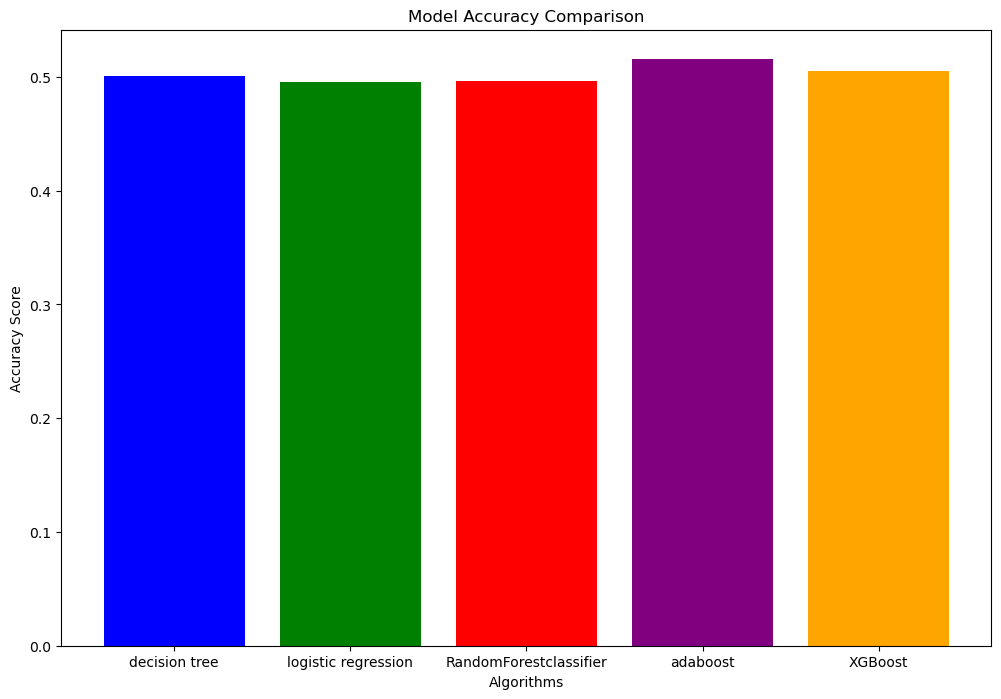

In [88]:
plt.figure(figsize=(12, 8))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()

In [89]:
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_accuracy = accuracy_scores[best_model]

print(f"\n Best Model: {best_model} with Accuracy: {best_accuracy:.4f}")


 Best Model: adaboost with Accuracy: 0.5157
